# Text Classification Using Naive Bayes

In this workbook, we are using Naive Bayes to classify news group documents into one of 20 newsgroups.  Data is from the 20 Newsgroups data set, which is available at http://qwone.com/~jason/20Newsgroups/.

Multinomial Naive Bayes text classification is done initially using scikit-learn, and then by performing calculations manually.  The error rate in both cases is similar, at approximately 22% on the test data.  The 22% error rate was obtained by applying LaPlace smoothing and using log likelihoods.  Removal of stopwords improves the model, decreasing error to approximately 20%.

This workbook includes the following sections:
* Download and Read Data
* Create Naive Bayes Classifier (using scikit-learn)
    - Create Word Frequency Matrix
    - Build Classifier from Training Data
    - Evaluate Performance on Test Data
    - Visualizing Error by Plotting Confusion Matrix
* Create Naive Bayses Classifier Manually
* Removing Stopwords from Vocabulary

Note that code for plotting confusion matrices was modified from example code found at http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.

## Download and Read Data

In [1]:
!pwd

/Users/joshwilson/Documents/DSE/jsw037/DSE210/NB


In [2]:
# create and move to 'data' directory
!mkdir 'data'
%cd data

mkdir: data: File exists
/Users/joshwilson/Documents/DSE/jsw037/DSE210/NB/data


In [3]:
# get the '20news-bydate.tar.gz' data
!curl http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz -o '20news-bydate.tar.gz'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.7M  100 13.7M    0     0  2263k      0  0:00:06  0:00:06 --:--:-- 2737k


In [4]:
# uncompress the '20news-bydate.tar.gz' data
!tar zxf 20news-bydate.tar.gz

In [5]:
# get the '20news-bydate-matlab.tgz' data
!curl http://qwone.com/~jason/20Newsgroups/20news-bydate-matlab.tgz -o '20news-bydate-matlab.tgz'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7398k  100 7398k    0     0  2072k      0  0:00:03  0:00:03 --:--:-- 2073k


In [6]:
# uncompress the '20news-bydate-matlab.tgz' data
!tar zxf 20news-bydate-matlab.tgz

In [7]:
# download vocabulary file
!curl http://qwone.com/~jason/20Newsgroups/vocabulary.txt -o 'vocabulary.txt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  482k  100  482k    0     0   593k      0 --:--:-- --:--:-- --:--:--  594k


In [8]:
# import packages
import pandas as pd
import numpy as np
from sklearn import naive_bayes as nb

In [9]:
# read in relevant training files
train_data = pd.read_table('20news-bydate/matlab/train.data', sep = ' ', 
                          header = None, names = ['docIdx', 'wordIdx', 'count'])
train_label = pd.read_table('20news-bydate/matlab/train.label', sep = ' ', 
                          header = None, names = ['label_id'])
train_map = pd.read_table('20news-bydate/matlab/train.map', sep = ' ', 
                          header = None, names = ['label_name', 'label_id'])

In [10]:
train_data.head()

,docIdx,wordIdx,count
0,1,1,4
1,1,2,2
2,1,3,10
3,1,4,4
4,1,5,2


In [11]:
# read in relevant test files
test_data = pd.read_table('20news-bydate/matlab/test.data', sep = ' ', 
                          header = None, names = ['docIdx', 'wordIdx', 'count'])
test_label = pd.read_table('20news-bydate/matlab/test.label', sep = ' ', 
                          header = None, names = ['label_id'])
test_map = pd.read_table('20news-bydate/matlab/test.map', sep = ' ', 
                          header = None, names = ['label_name', 'label_id'])

In [12]:
test_data.head()

,docIdx,wordIdx,count
0,1,3,1
1,1,10,1
2,1,12,8
3,1,17,1
4,1,23,8


In [13]:
# read in vocabulary.txt
vocabulary = pd.read_table('vocabulary.txt', header = None, names = ['word'])

In [14]:
vocabulary.head()

,word
0,archive
1,name
2,atheism
3,resources
4,alt


## Create Naive Bayes Classifier

### Create Word Frequency Matrix

In [15]:
# create empty train_data_matrix
train_data_matrix = np.zeros((len(train_data['docIdx'].unique()),
                            len(vocabulary['word'])))
print "train_data_matrix shape : ", train_data_matrix.shape

train_data_matrix shape :  (11269, 61188)


In [16]:
# from train_data, pull row and column indices, and associated values from train_data
rows = np.array(train_data['docIdx'])-1
cols = np.array(train_data['wordIdx'])-1
vals = np.array(train_data['count'])

In [17]:
# populate train_data_matrix
for i in range(len(rows)):
    train_data_matrix[rows[i], cols[i]] = vals[i]    

In [18]:
train_data_matrix

array([[  4.,   2.,  10., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [19]:
# set the target values equal to the correct label_ids from train_label
train_data_target = np.array(train_label['label_id'])
print train_data_target.shape
train_data_target

(11269,)


array([ 1,  1,  1, ..., 20, 20, 20])

### Build Classifier from Training Data

In [20]:
mnb = nb.MultinomialNB()
mnb_fit = mnb.fit(train_data_matrix, train_data_target)
mnb_pred = mnb_fit.predict(train_data_matrix)

In [21]:
mnb_pred

array([ 1,  1, 11, ..., 20, 20, 17])

In [22]:
train_data_target

array([ 1,  1,  1, ..., 20, 20, 20])

In [23]:
print("Number of mislabeled points out of a total %d points : %d" 
      % (train_data_matrix.shape[0], (train_data_target != mnb_pred).sum()))

print("Training data error rate : %.4f"
      % (float((train_data_target != mnb_pred).sum()) / float(train_data_matrix.shape[0])))

Number of mislabeled points out of a total 11269 points : 664
Training data error rate : 0.0589


### Evaluate Performance on Test Data

In [24]:
# create empty test_data_matrix
test_data_matrix = np.zeros((len(test_data['docIdx'].unique()),
                            len(vocabulary['word'])))
print "test_data_matrix shape : ", test_data_matrix.shape

test_data_matrix shape :  (7505, 61188)


In [25]:
# from test_data, pull row and column indices, and associated values from test_data
rows = np.array(test_data['docIdx'])-1
cols = np.array(test_data['wordIdx'])-1
vals = np.array(test_data['count'])

In [26]:
# populate test_data_matrix
for i in range(len(rows)):
    test_data_matrix[rows[i], cols[i]] = vals[i]

In [27]:
test_data_matrix

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.]])

In [28]:
# set the target values equal to the correct label_ids from test_label
test_data_target = np.array(test_label['label_id'])
print test_data_target.shape
test_data_target

(7505,)


array([ 1,  1,  1, ..., 20, 20, 20])

In [29]:
# make predictions on test data
mnb_pred_test = mnb_fit.predict(test_data_matrix)

In [30]:
mnb_pred_test

array([ 1,  1,  1, ...,  1, 16,  2])

In [31]:
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_data_matrix.shape[0], (test_data_target != mnb_pred_test).sum()))

print("Test data error rate : %.4f"
      % (float((test_data_target != mnb_pred_test).sum()) / float(test_data_matrix.shape[0])))

Number of mislabeled points out of a total 7505 points : 1643
Test data error rate : 0.2189


### Visualizing Error by Plotting Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [33]:
%matplotlib inline

In [34]:
# plot_confusion_matrix code from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

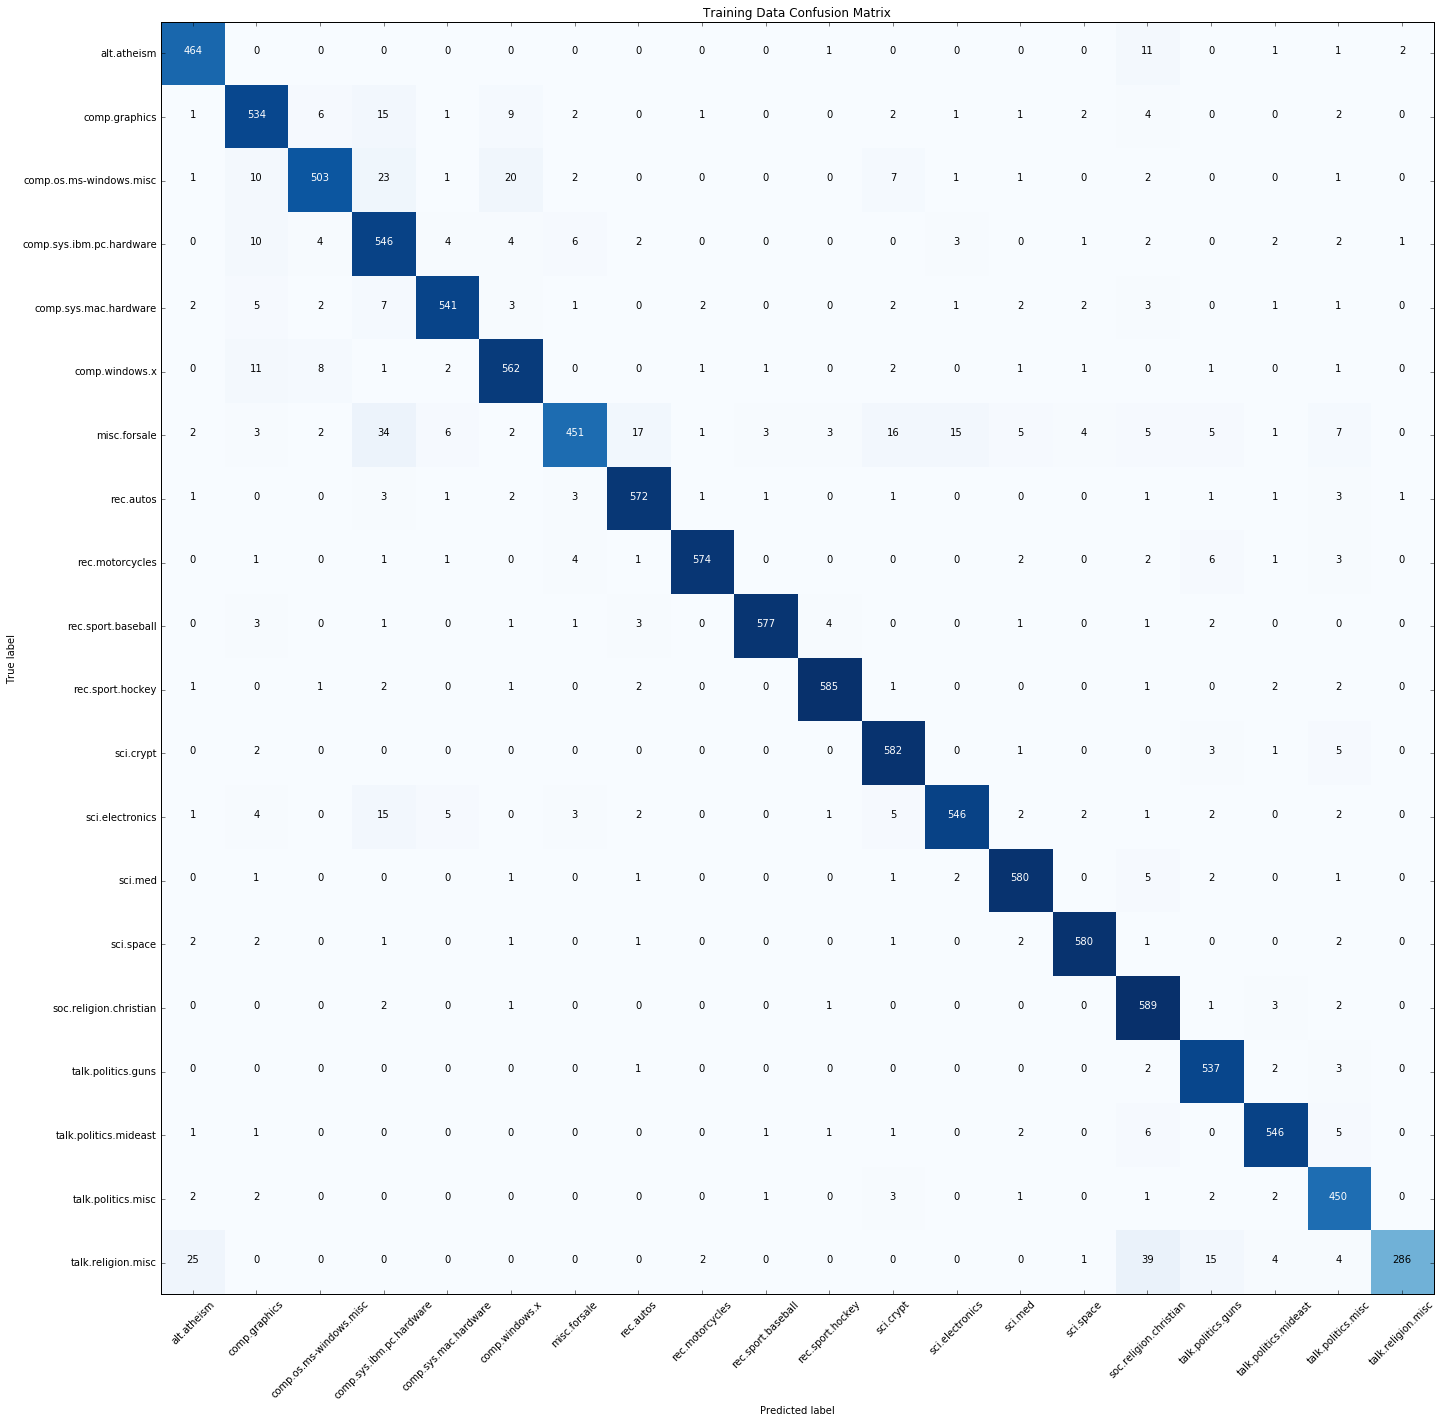

In [35]:
class_names_train = train_map['label_name'].values

# Compute confusion matrix
cnf_matrix_train = confusion_matrix(train_data_target, mnb_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (20,20))
plot_confusion_matrix(cnf_matrix_train, classes=class_names_train,
                      title='Training Data Confusion Matrix')

plt.show();

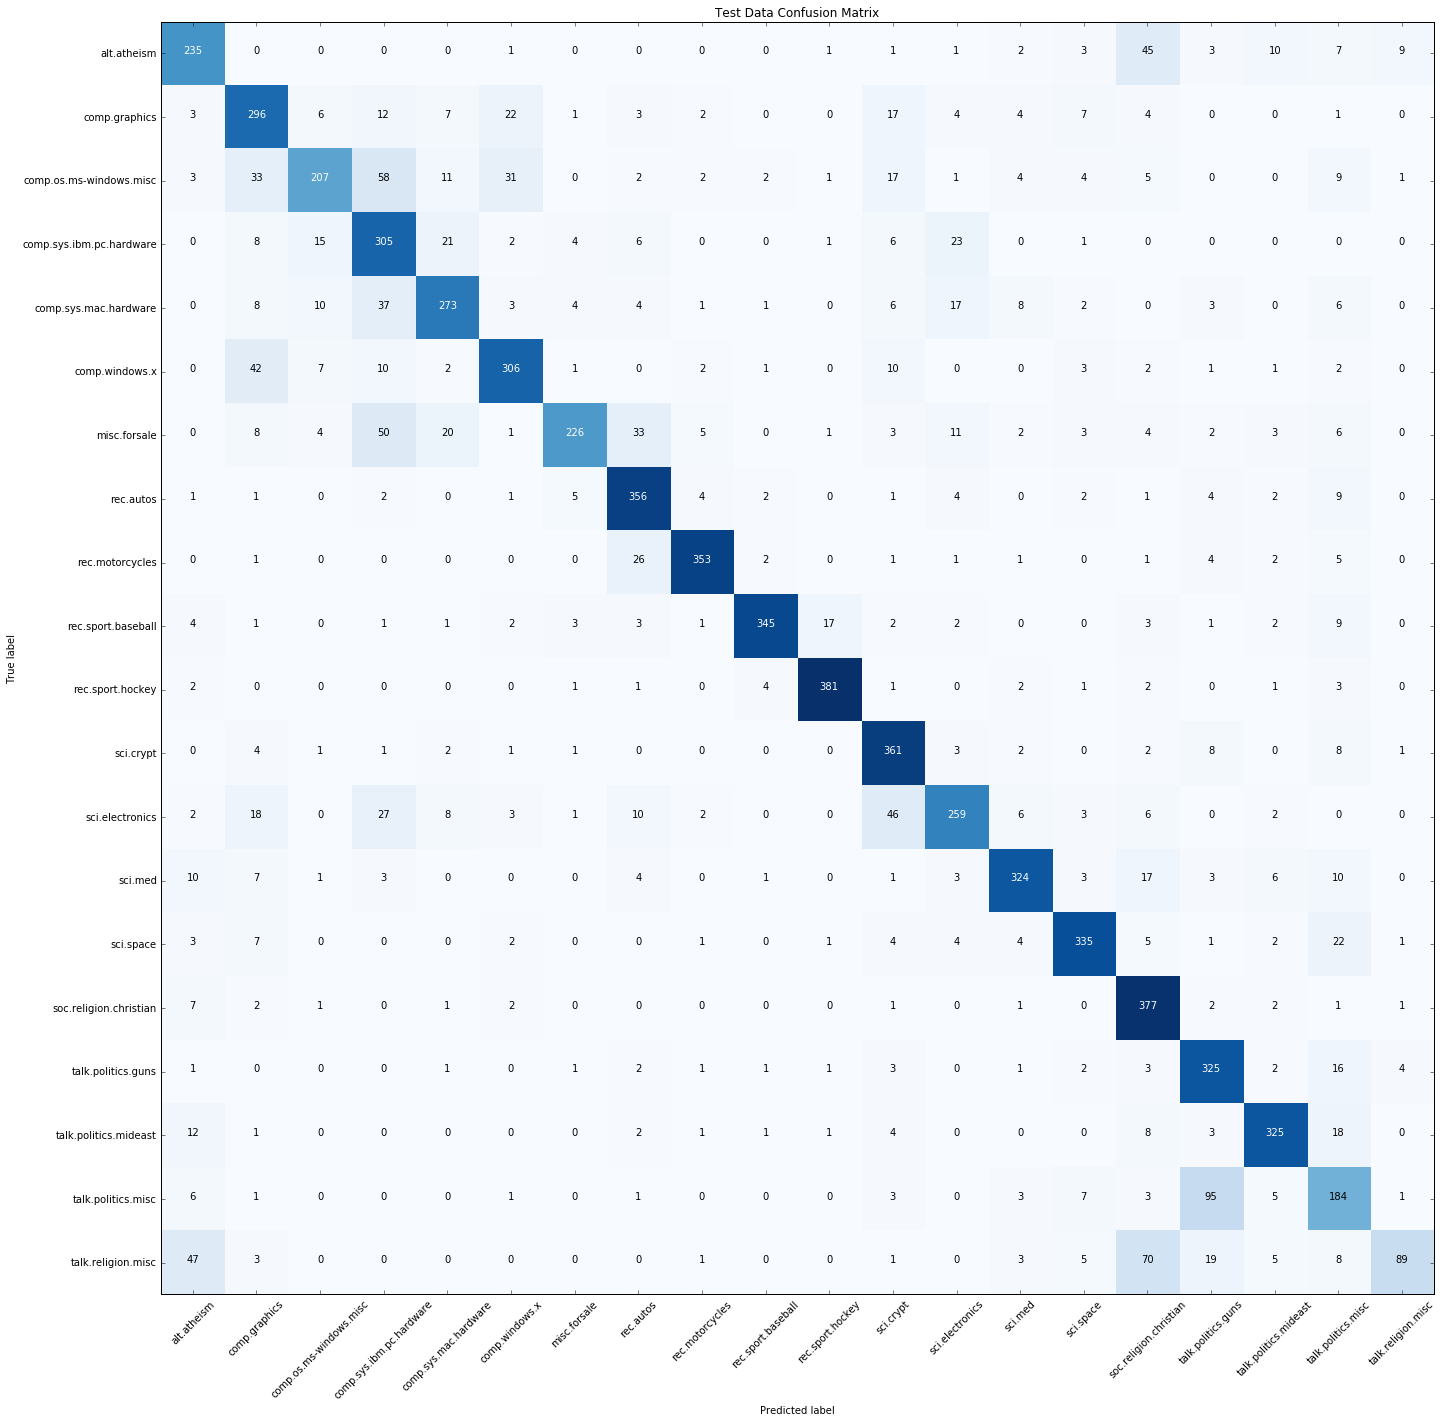

In [36]:
class_names_test = test_map['label_name'].values

# Compute confusion matrix
cnf_matrix_test = confusion_matrix(test_data_target, mnb_pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (20,20))
plot_confusion_matrix(cnf_matrix_test, classes=class_names_test,
                      title='Test Data Confusion Matrix')

plt.show();

## Create Naive Bayes Classifier Manually
In this section, we perform Multinomial Naive Bayes calculation manually, resulting in accuracy results very similar to those obtained using Multinomial Naive Bayes from scikit-learn.

Laplace smoothing and log likelihoods are used.


In [37]:
# add label_ids to train_data
label_ids = pd.DataFrame(train_label.iloc[train_data['docIdx']-1]['label_id'])
if 'label_id' not in train_data.columns:
    train_data.insert(len(train_data.columns), 'label_id', label_ids.values)

train_data.head()

,docIdx,wordIdx,count,label_id
0,1,1,4,1
1,1,2,2,1
2,1,3,10,1
3,1,4,4,1
4,1,5,2,1


In [38]:
# calculate fraction of documents that belong to each class in the training data set
classes = train_data['label_id'].unique()

# get label_id values
label_ids = np.array(train_data['label_id'].values)

# determine counts by label_id
values, counts = np.unique(label_ids, return_counts=True)

# calculate fraction of each count
class_probability = 1.0 * counts / sum(counts)

print 'class_probability:\n', class_probability

print '\nCheck that sum of all probabilities add to one:\n', sum(class_probability)

class_probability:
[ 0.05  0.04  0.04  0.04  0.04  0.05  0.03  0.05  0.05  0.04  0.05  0.07
  0.04  0.06  0.06  0.07  0.06  0.08  0.06  0.04]

Check that sum of all probabilities add to one:
1.0


In [39]:
# group training data by label_id and wordIdx to determine total occurrences of each word by class
train_data_grouped = train_data.groupby(['label_id','wordIdx'], as_index=False).sum()
del train_data_grouped['docIdx']
train_data_grouped.head()

,label_id,wordIdx,count
0,1,1,13
1,1,2,63
2,1,3,275
3,1,4,9
4,1,5,82


In [40]:
# populate train_word_counts matrix
train_word_counts = np.zeros((len(classes), len(vocabulary.index)))

rows = np.array(train_data_grouped['label_id'].values - 1)
cols = np.array(train_data_grouped['wordIdx'].values - 1)
counts = np.array(train_data_grouped['count'].values)

for i in range(len(rows)):
    train_word_counts[rows[i], cols[i]] = counts[i]

# Laplace add 1 smoothing
train_word_counts += 1

print 'train_word_counts shape:\n', train_word_counts.shape
print '\ntrain_word_counts:\n', train_word_counts

train_word_counts shape:
(20, 61188)

train_word_counts:
[[  14.   64.  276. ...,    1.    1.    1.]
 [  61.   60.    1. ...,    1.    1.    1.]
 [  12.   70.    1. ...,    1.    1.    1.]
 ..., 
 [  11.  155.    1. ...,    1.    1.    1.]
 [   1.   40.    1. ...,    1.    1.    1.]
 [   1.   46.   10. ...,    1.    1.    1.]]


In [41]:
# calculate probability distribution of each word for each class
train_word_dist = (train_word_counts.T / train_word_counts.sum(axis=1)).T

print 'train_word_dist shape:\n', train_word_dist.shape
print '\ntrain_word_dist:\n', train_word_dist
print '\n Check that all row sums are 1:\n', np.apply_along_axis(sum, 1, train_word_dist)

train_word_dist shape:
(20, 61188)

train_word_dist:
[[  6.67e-05   3.05e-04   1.31e-03 ...,   4.76e-06   4.76e-06   4.76e-06]
 [  3.56e-04   3.50e-04   5.83e-06 ...,   5.83e-06   5.83e-06   5.83e-06]
 [  7.90e-05   4.61e-04   6.58e-06 ...,   6.58e-06   6.58e-06   6.58e-06]
 ..., 
 [  3.48e-05   4.91e-04   3.16e-06 ...,   3.16e-06   3.16e-06   3.16e-06]
 [  4.04e-06   1.62e-04   4.04e-06 ...,   4.04e-06   4.04e-06   4.04e-06]
 [  5.55e-06   2.55e-04   5.55e-05 ...,   5.55e-06   5.55e-06   5.55e-06]]

 Check that all row sums are 1:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [42]:
# calculate log likelihood values
log_class = np.log(class_probability)
log_probs = np.log(train_word_dist)
scores = log_class + np.dot(test_data_matrix, log_probs.T)
print '\nlog likelihood of test data for each class:\n', scores


log likelihood of test data for each class:
[[-2004.3  -2229.87 -2252.07 ..., -2146.76 -2116.18 -2078.95]
 [ -512.91  -586.9   -588.46 ...,  -547.43  -555.46  -541.86]
 [-2310.65 -2553.51 -2567.44 ..., -2453.86 -2439.48 -2439.93]
 ..., 
 [ -810.16  -867.09  -871.81 ...,  -868.1   -852.14  -846.51]
 [-1204.76 -1277.19 -1287.52 ..., -1217.57 -1214.   -1193.91]
 [-3153.09 -3047.67 -3119.64 ..., -3186.16 -3162.43 -3158.7 ]]


In [43]:
# make class prediction from scores
predictions = np.argmax(scores, axis=1) + 1
print 'class predictions for test data:\n', predictions
print '\nclass prediction counts:\n', np.unique(predictions, return_counts=True)[1]

class predictions for test data:
[ 1  1  1 ...,  1 16  2]

class prediction counts:
[335 440 248 505 342 382 242 456 377 357 406 494 327 368 381 561 475 376
 326 107]


In [44]:
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_data_matrix.shape[0], (test_data_target != predictions).sum()))

print("Test data error rate : %.4f"
      % (float((test_data_target != predictions).sum()) / float(test_data_matrix.shape[0])))

Number of mislabeled points out of a total 7505 points : 1657
Test data error rate : 0.2208


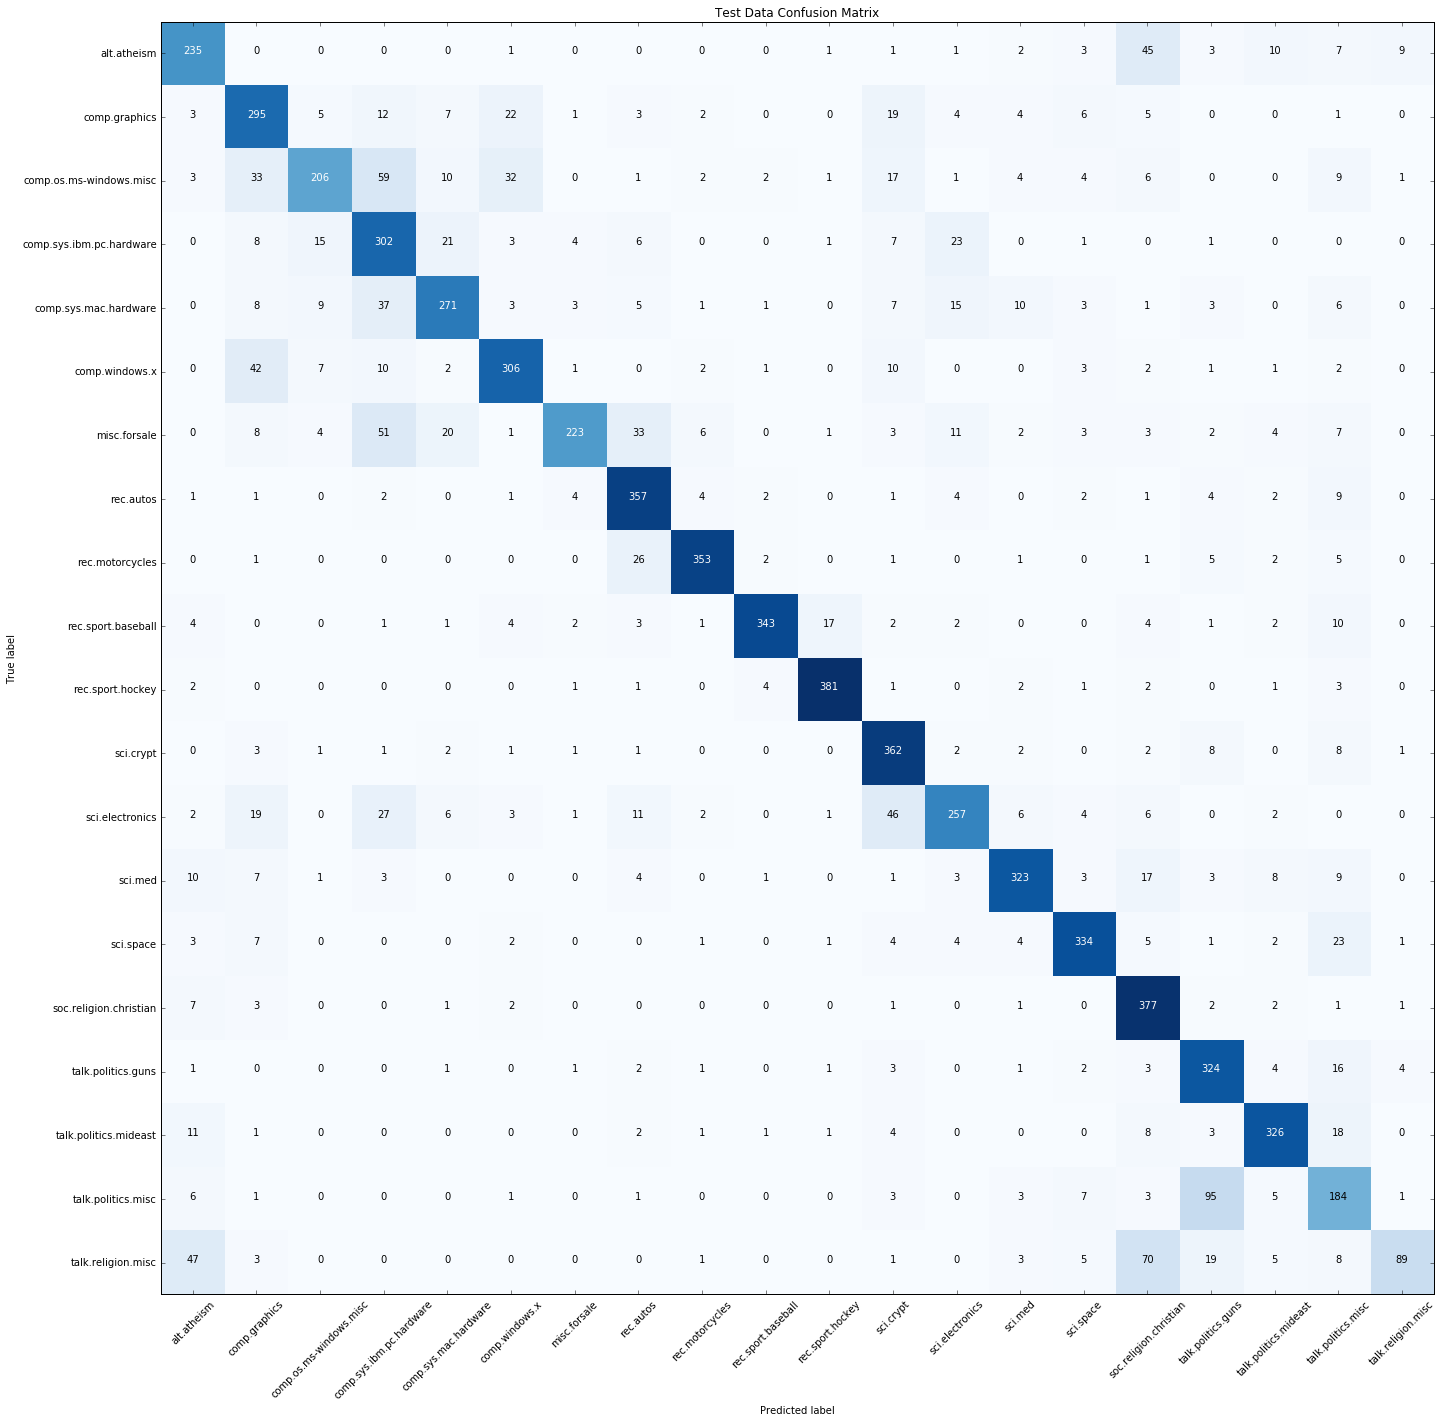

In [45]:
# Compute confusion matrix
cnf_matrix_test_man = confusion_matrix(test_data_target, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (20,20))
plot_confusion_matrix(cnf_matrix_test_man, classes=class_names_test,
                      title='Test Data Confusion Matrix')

plt.show();

## Removing Stopwords from Vocabulary
In an attempt to improve our prediction accuracy, we will remove stopwords from our vocabulary and re-create our classifier.

First, we import stopwords from the nltk package.  Then we remove the stopwords to create a new vocabulary, and remove stopword data from our train_data and test_data DataFrames.

In [46]:
from nltk.corpus import stopwords

In [47]:
# get list of stopwords
stop_words = np.array(stopwords.words('english'))

# identify indices from vocabulary that correspond to stopwords
orig_vocab = np.array(vocabulary['word'].values)
stop_word_indices = np.nonzero(np.in1d(orig_vocab, stop_words))[0]

# create new vocabulary without stopwords
reduced_vocab = np.delete(orig_vocab, stop_word_indices)

# create new train and test dataframes by removing rows corresponding to stopwords
words_to_remove = stop_word_indices + 1
train_data_small = train_data[~train_data['wordIdx'].isin(words_to_remove)]
test_data_small = test_data[~test_data['wordIdx'].isin(words_to_remove)]

print 'original train_data shape:', train_data.shape
print 'new train_data shape:', train_data_small.shape

print '\noriginal test_data shape:', test_data.shape
print 'new test_data shape:', test_data_small.shape

original train_data shape: (1467345, 4)
new train_data shape: (1091231, 4)

original test_data shape: (967874, 3)
new test_data shape: (717579, 3)


Now, we need to update the train and test data to include the new wordIdx values based on the new vocabulary after removal of stopwords.

In [48]:
# get wordIdx from original vocabulary
train_wordIdx = np.unique(train_data_small['wordIdx'].values)
test_wordIdx = np.unique(test_data_small['wordIdx'].values)

# get vocabulary words corresponding to original wordIdx
orig_train_words = vocabulary.iloc[train_wordIdx - 1]['word'].unique()
orig_test_words = vocabulary.iloc[test_wordIdx - 1]['word'].unique()

# get index of words from reduced vocabulary
reduced_vocab_wordIdx_train = np.where(np.in1d(reduced_vocab, orig_train_words))[0] + 1
reduced_vocab_wordIdx_test = np.where(np.in1d(reduced_vocab, orig_test_words))[0] + 1

# replace original train_wordIdx values with corresponding reduced_vocab_wordIdx values
dtrain = {'wordIdx': train_wordIdx, 'new_wordIdx': reduced_vocab_wordIdx_train}
train_wordIdx_map = pd.DataFrame(dtrain)

dtest = {'wordIdx': test_wordIdx, 'new_wordIdx': reduced_vocab_wordIdx_test}
test_wordIdx_map = pd.DataFrame(dtest)

train_data_nsw = pd.merge(train_data_small, train_wordIdx_map, how = 'inner', on = 'wordIdx')
test_data_nsw = pd.merge(test_data_small, test_wordIdx_map, how = 'inner', on = 'wordIdx')

//anaconda/envs/python2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:396: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  bool_ar = (sar[1:] == sar[:-1])


Inspect the last few entries of each DataFrame to ensure the new_wordIdx values appear to map to the new (smaller) vocabulary.

In [49]:
train_data_nsw.tail()

,docIdx,wordIdx,count,label_id,new_wordIdx
1091226,11264,53971,1,20,53827
1091227,11265,53972,1,20,53828
1091228,11267,53973,1,20,53829
1091229,11268,53974,1,20,53830
1091230,11268,53975,1,20,53831


In [50]:
test_data_nsw.tail()

,docIdx,wordIdx,count,new_wordIdx
717574,7501,61187,1,61043
717575,7505,6727,1,6590
717576,7505,40730,1,40587
717577,7505,44515,1,44372
717578,7505,61188,2,61044


### Train Naive Bayes Classifier using Updated Training Data

In [51]:
# create empty train_data_matrix
train_data_matrix_nsw = np.zeros((len(train_data['docIdx'].unique()), 
                                  len(reduced_vocab)))

# from train_data, pull row and column indices, and associated values from train_data
rows = np.array(train_data_nsw['docIdx'])-1
cols = np.array(train_data_nsw['new_wordIdx'])-1
vals = np.array(train_data_nsw['count'])

# populate train_data_matrix
for i in range(len(rows)):
    train_data_matrix_nsw[rows[i], cols[i]] = vals[i]

# Naive Bayes classifier
mnb = nb.MultinomialNB()
mnb_fit_nsw = mnb.fit(train_data_matrix_nsw, train_data_target)
mnb_pred_nsw = mnb_fit_nsw.predict(train_data_matrix_nsw)

print("Number of mislabeled points out of a total %d points : %d" 
      % (train_data_matrix_nsw.shape[0], (train_data_target != mnb_pred_nsw).sum()))

print("Training data error rate : %.4f"
      % (float((train_data_target != mnb_pred_nsw).sum()) / float(train_data_matrix_nsw.shape[0])))

Number of mislabeled points out of a total 11269 points : 527
Training data error rate : 0.0468


### Evaluate Accuracy on Test Set

In [52]:
# from test_data, pull row and column indices, and associated values from train_data
rows = np.array(test_data_nsw['docIdx'])-1
cols = np.array(test_data_nsw['new_wordIdx'])-1
vals = np.array(test_data_nsw['count'])

# create empty train_data_matrix
test_data_matrix_nsw = np.zeros((len(test_data['docIdx'].unique()), 
                                  len(reduced_vocab)))

# populate test_data_matrix
for i in range(len(rows)):
    test_data_matrix_nsw[rows[i], cols[i]] = vals[i]

# Predict test data results using trained Bayes classifier
mnb_pred_nsw_test = mnb_fit_nsw.predict(test_data_matrix_nsw)

print 'Test dataset error rate using vocabulary with stopwords removed:'
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_data_matrix_nsw.shape[0], (test_data_target != mnb_pred_nsw_test).sum()))

print("Test data error rate : %.4f"
      % (float((test_data_target != mnb_pred_nsw_test).sum()) / float(test_data_matrix_nsw.shape[0])))

print '\nTest dataset error rate using original vocabulary:'
print("Number of mislabeled points out of a total %d points : %d" 
      % (test_data_matrix.shape[0], (test_data_target != mnb_pred_test).sum()))

print("Test data error rate : %.4f"
      % (float((test_data_target != mnb_pred_test).sum()) / float(test_data_matrix.shape[0])))

Test dataset error rate using vocabulary with stopwords removed:
Number of mislabeled points out of a total 7505 points : 1495
Test data error rate : 0.1992

Test dataset error rate using original vocabulary:
Number of mislabeled points out of a total 7505 points : 1643
Test data error rate : 0.2189


### Stopword Removal Results
Removal of stopwords only slightly increases performance on the test data, improving the error rate from approximately 22% to approximately 20%.